In [274]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Take a quick look at the data

In [275]:
# Data: .https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset

In [276]:
data = pd.read_csv('C:\\Mobile Device\\Mobile Device .csv')

In [277]:
print("First few rows of the dataset and shape:")
print(data.shape)
data.head()

First few rows of the dataset and shape:
(700, 11)


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [278]:
print("\nData structure information:")
print(data.info())


Data structure information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None


In [279]:
print("\nSummary statistics of numerical columns:")
print(data.describe())


Summary statistics of numerical columns:
         User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  700.00000                700.000000                  700.000000   
mean   350.50000                271.128571                    5.272714   
std    202.21688                177.199484                    3.068584   
min      1.00000                 30.000000                    1.000000   
25%    175.75000                113.250000                    2.500000   
50%    350.50000                227.500000                    4.900000   
75%    525.25000                434.250000                    7.400000   
max    700.00000                598.000000                   12.000000   

       Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
count               700.000000                700.000000           700.000000   
mean               1525.158571                 50.681429           929.742857   
std                 819.136414                 2

In [280]:
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object


In [281]:
print("\nUnique values in each column:")
print(data.nunique())


Unique values in each column:
User ID                       700
Device Model                    5
Operating System                2
App Usage Time (min/day)      387
Screen On Time (hours/day)    108
Battery Drain (mAh/day)       628
Number of Apps Installed       86
Data Usage (MB/day)           585
Age                            42
Gender                          2
User Behavior Class             5
dtype: int64


In [282]:
print("\nValue counts for the 'Gender' column:")
print(data['Gender'].value_counts())
print("\nValue counts for the 'Device Model' column:")
print(data['Device Model'].value_counts())
print("\nValue counts for the 'Operating System' column:")
print(data['Operating System'].value_counts())


Value counts for the 'Gender' column:
Gender
Male      364
Female    336
Name: count, dtype: int64

Value counts for the 'Device Model' column:
Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

Value counts for the 'Operating System' column:
Operating System
Android    554
iOS        146
Name: count, dtype: int64


In [283]:
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())


Number of duplicate rows:
0


## Split the data into Training, Validation, and Test sets

In [284]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.dummy import DummyClassifier

In [285]:
X = data.drop(['User Behavior Class'], axis=1)
y = data['User Behavior Class']


# Random Split

In [286]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nValue Counts for Target Variable (Random Split):")
print("Training set (User Behavior Class):")
print(y_train.value_counts(normalize=True)) 
print("\nValidation set (User Behavior Class):")
print(y_val.value_counts(normalize=True))    
print("\nTest set (User Behavior Class):")
print(y_test.value_counts(normalize=True))   


Value Counts for Target Variable (Random Split):
Training set (User Behavior Class):
User Behavior Class
2    0.250000
5    0.200000
4    0.195238
3    0.178571
1    0.176190
Name: proportion, dtype: float64

Validation set (User Behavior Class):
User Behavior Class
3    0.264286
1    0.235714
4    0.178571
5    0.178571
2    0.142857
Name: proportion, dtype: float64

Test set (User Behavior Class):
User Behavior Class
4    0.228571
3    0.221429
1    0.207143
5    0.192857
2    0.150000
Name: proportion, dtype: float64


# Stratified Split

In [287]:
print(y.value_counts())


User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64


In [288]:
X_train_strat, X_temp_strat, y_train_strat, y_temp_strat = train_test_split(X, y, test_size=0.4, random_state=42)
X_val_strat, X_test_strat, y_val_strat, y_test_strat = train_test_split(X_temp_strat, y_temp_strat, test_size=0.5, random_state=42)


print("\nValue Counts for Target Variable (Stratified Split):")
print("Training set (User Behavior Class):")
print(y_train_strat.value_counts(normalize=True))
print("\nValidation set (User Behavior Class):")
print(y_val_strat.value_counts(normalize=True))  
print("\nTest set (User Behavior Class):")
print(y_test_strat.value_counts(normalize=True))


Value Counts for Target Variable (Stratified Split):
Training set (User Behavior Class):
User Behavior Class
2    0.250000
5    0.200000
4    0.195238
3    0.178571
1    0.176190
Name: proportion, dtype: float64

Validation set (User Behavior Class):
User Behavior Class
3    0.264286
1    0.235714
4    0.178571
5    0.178571
2    0.142857
Name: proportion, dtype: float64

Test set (User Behavior Class):
User Behavior Class
4    0.228571
3    0.221429
1    0.207143
5    0.192857
2    0.150000
Name: proportion, dtype: float64


# Cross-validation (Data Leakage)

## Wrong

In [289]:
X_clean = X.copy()
y_clean = y.copy()

dummy_clf = DummyClassifier(strategy='most_frequent')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(dummy_clf, X_clean, y_clean, cv=skf)

print("\nCross-Validation Scores:")
print(cross_val_scores)


Cross-Validation Scores:
[0.20714286 0.20714286 0.21428571 0.20714286 0.20714286]


## Right

In [290]:
dummy_clf = DummyClassifier(strategy='most_frequent')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

class DataCleaner:
    def fit(self, X, y=None):
        pass
    
    def transform(self, X):
        return X

cross_val_scores = []

for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    cleaner = DataCleaner()

    cleaner.fit(X_train)

    X_train_cleaned = cleaner.transform(X_train)
    X_val_cleaned = cleaner.transform(X_val)

    dummy_clf.fit(X_train_cleaned, y_train)

    score = dummy_clf.score(X_val_cleaned, y_val)
    cross_val_scores.append(score)

print("\nCross-Validation Scores:")
print(cross_val_scores)


Cross-Validation Scores:
[0.20714285714285716, 0.20714285714285716, 0.21428571428571427, 0.20714285714285716, 0.20714285714285716]


In [291]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [292]:
print(f"Training set (X_train, y_train) shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set (X_val, y_val) shape: {X_val.shape}, {y_val.shape}")
print(f"Test set (X_test, y_test) shape: {X_test.shape}, {y_test.shape}")

Training set (X_train, y_train) shape: (420, 10), (420,)
Validation set (X_val, y_val) shape: (140, 10), (140,)
Test set (X_test, y_test) shape: (140, 10), (140,)


In [293]:
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

# Exploratory Data Analysis (EDA)

### Explore relationships between features and the target variable

Target variable distribution ('User Behavior Class')
User Behavior Class
2    0.209524
3    0.204762
4    0.197619
1    0.195238
5    0.192857
Name: proportion, dtype: float64


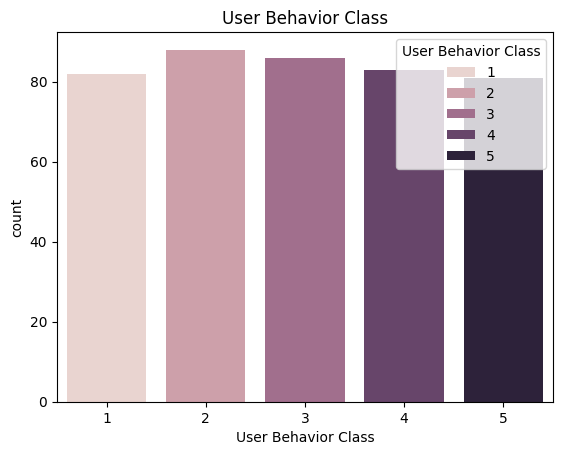

In [294]:
print("Target variable distribution ('User Behavior Class')")
print(y_train.value_counts(normalize=True))
sns.countplot(x=y_train, hue=y_train)
plt.title('User Behavior Class')
plt.show()

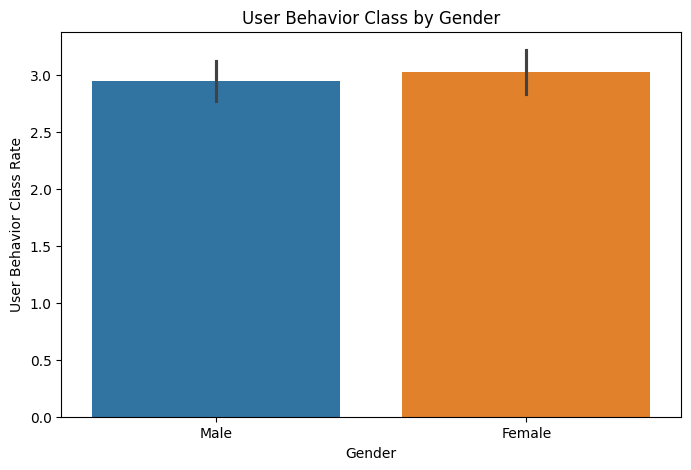

In [295]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y=y_train, data=X_train, hue='Gender')
plt.title('User Behavior Class by Gender')
plt.ylabel('User Behavior Class Rate')
plt.show()

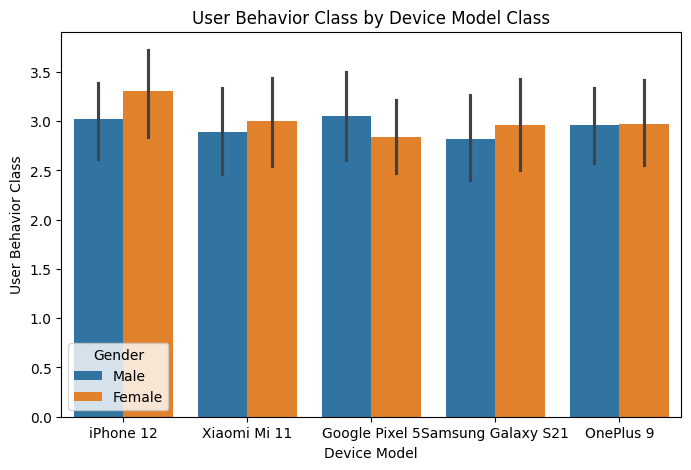

In [296]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Device Model', y=y_train, data=X_train, hue='Gender')
plt.title('User Behavior Class by Device Model Class')
plt.ylabel('User Behavior Class')
plt.show()

In [297]:
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

In [298]:
# Access Missing Values

In [299]:
print("\nMissing Values in Each Column:")
print(X_train.isnull().sum())


Missing Values in Each Column:
User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
dtype: int64


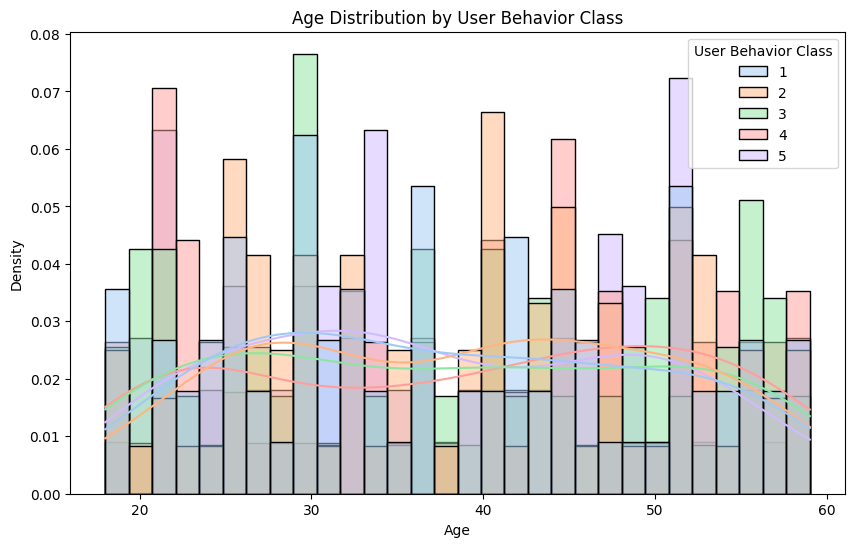

C:\Users\User\AppData\Local\Temp\ipykernel_12652\2384112527.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=['User Behavior Class'])


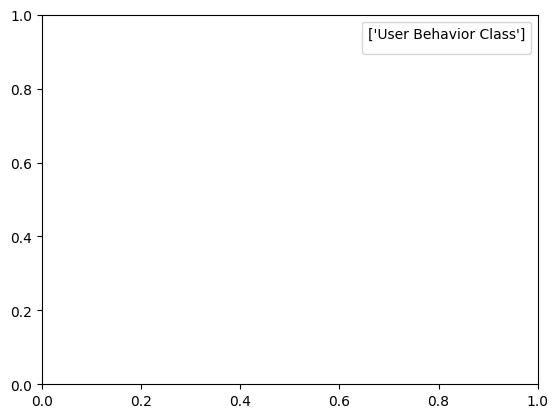

In [300]:
plt.figure(figsize=(10, 6))
sns.histplot(data=X_train, x='Age', hue=y_train, bins=30, kde=True, 
             palette='pastel', stat='density', common_norm=False)

plt.title('Age Distribution by User Behavior Class')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()
plt.legend(title=['User Behavior Class'])

### Explore relationships between features and other features

Correlation Matrix:
                             User ID  App Usage Time (min/day)  \
User ID                     1.000000                 -0.022452   
App Usage Time (min/day)   -0.022452                  1.000000   
Screen On Time (hours/day) -0.011554                  0.949837   
Battery Drain (mAh/day)    -0.029152                  0.955487   
Number of Apps Installed   -0.029809                  0.954847   
Data Usage (MB/day)        -0.000340                  0.942232   
Age                         0.017343                 -0.016163   

                            Screen On Time (hours/day)  \
User ID                                      -0.011554   
App Usage Time (min/day)                      0.949837   
Screen On Time (hours/day)                    1.000000   
Battery Drain (mAh/day)                       0.947880   
Number of Apps Installed                      0.945252   
Data Usage (MB/day)                           0.941334   
Age                                          

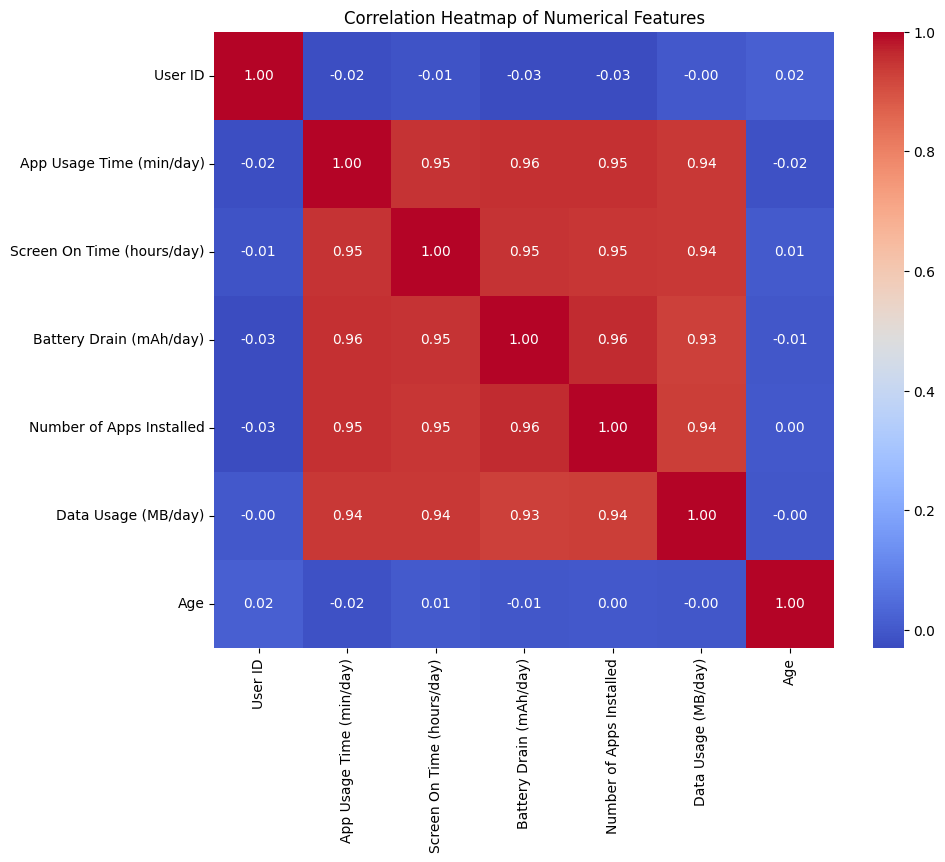

In [301]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64'])

corr_matrix = numerical_features.corr()

print("Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Split variables into numerical and categorical

In [302]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['User ID', 'App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']
Categorical Features: ['Device Model', 'Operating System', 'Gender']


# Numerical Features

## Discrete Features

In [303]:
discrete_var = [var for var in numerical_features if X_train[var].nunique() < 50]
print(len(discrete_var))
X_train[discrete_var].head()

1


,Age
59,56
297,53
13,43
248,50
394,45


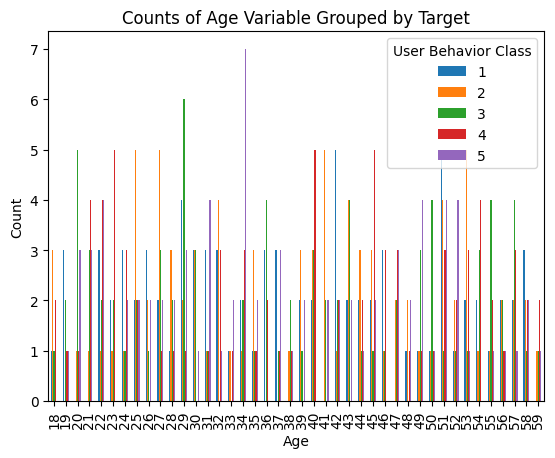

In [304]:
for var in discrete_var:
    ct = pd.crosstab(X_train[var], y_train)

    ct.plot(kind='bar')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Counts of {var} Variable Grouped by Target')
    plt.show()

## Continuous Feature

In [305]:
continuous_var = [var for var in numerical_features if var not in discrete_var + ["User Behavior Class"]]
print(len(continuous_var))
X_train[continuous_var].head()

6


,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day)
59,60,325,7.1,2269,64,1053
297,298,170,2.7,805,26,344
13,14,215,4.9,1662,43,857
248,249,168,4.0,866,22,581
394,395,589,9.2,2663,84,1774


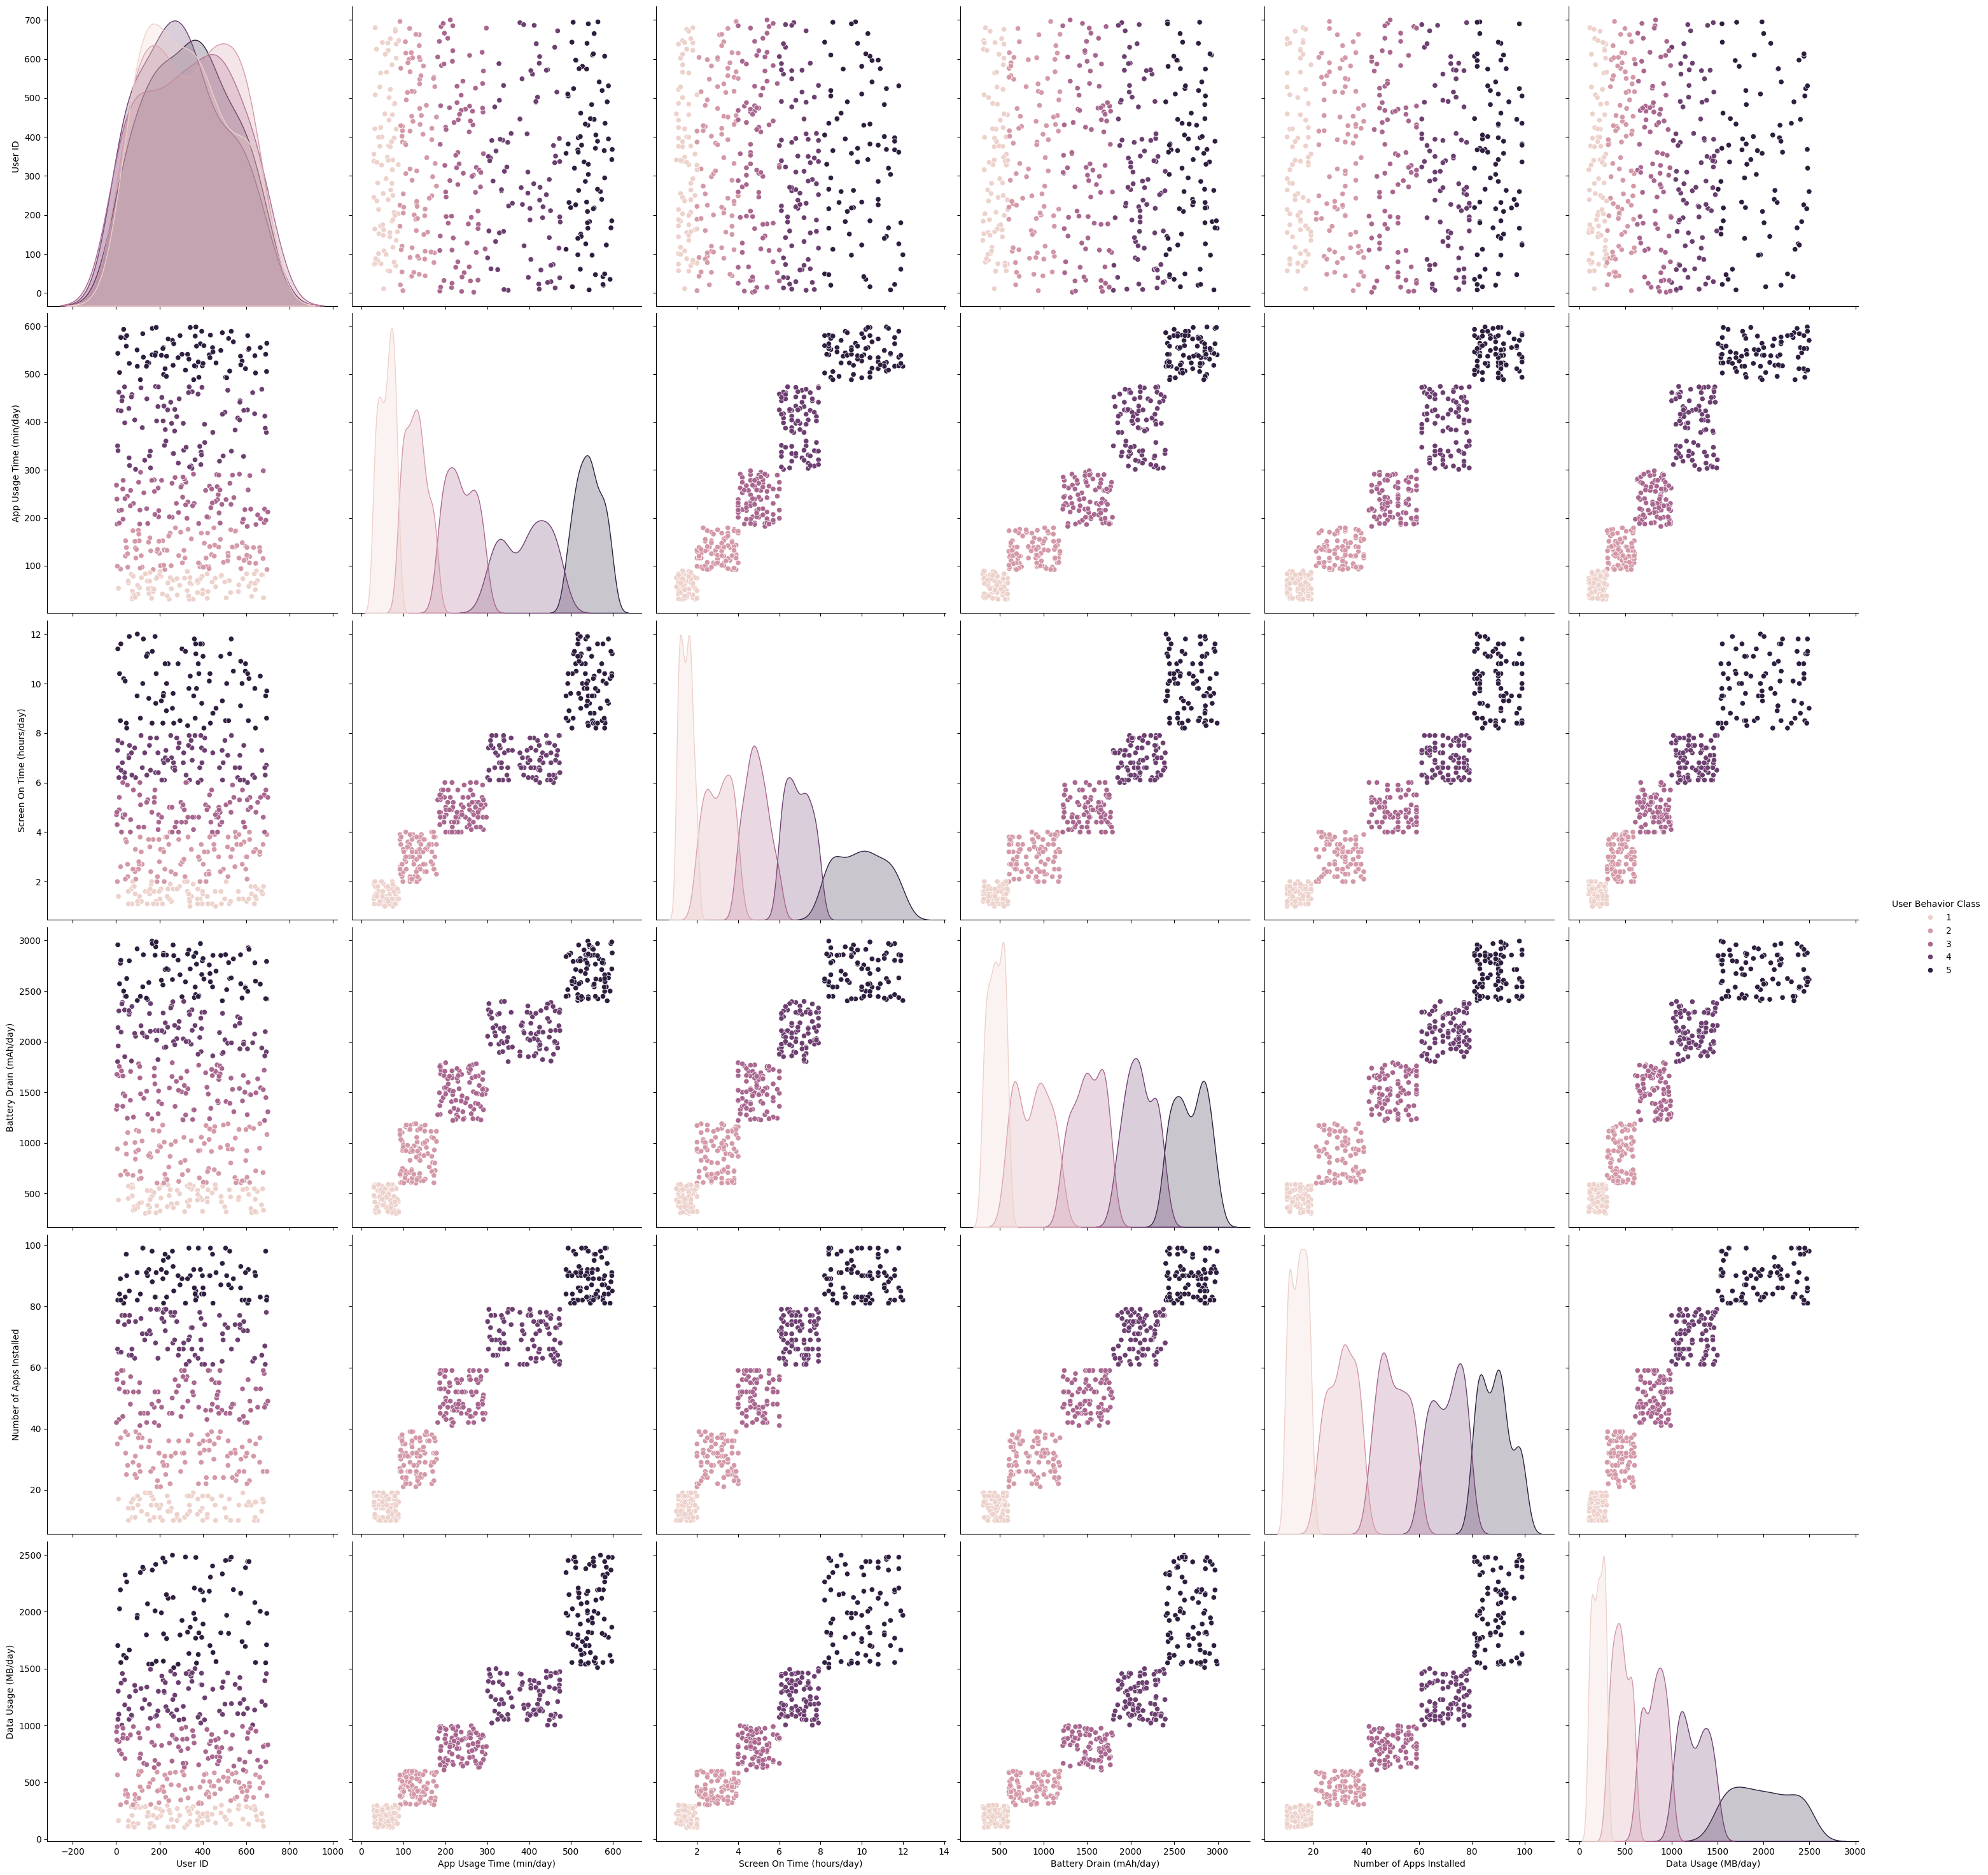

In [306]:
data_with_target = pd.concat([X_train[continuous_var], y_train], axis=1)

sns.pairplot(data_with_target, hue='User Behavior Class', height=5)


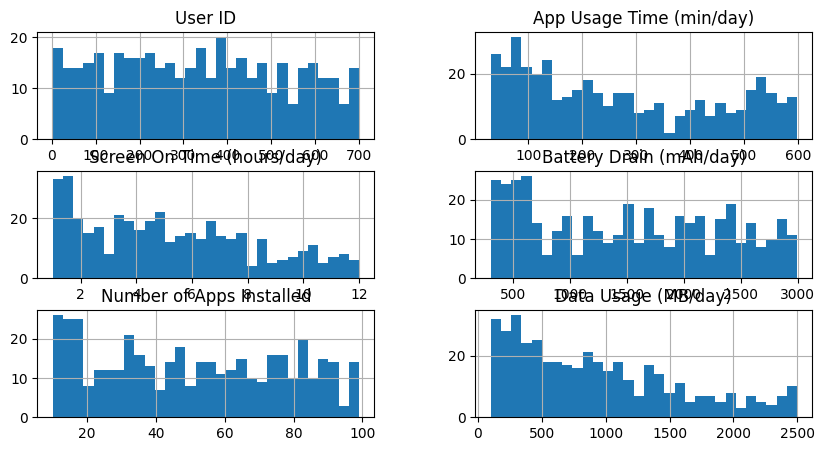

In [307]:
X_train[continuous_var].hist(bins=30, figsize=(10, 5));

# Categorical Feature

In [308]:
print(len(categorical_features))
X_train[categorical_features].head()

3


,Device Model,Operating System,Gender
59,iPhone 12,iOS,Male
297,iPhone 12,iOS,Female
13,Xiaomi Mi 11,Android,Male
248,Xiaomi Mi 11,Android,Female
394,Google Pixel 5,Android,Female


## Number of labels: Cardinality

Device Model        0.011905
Operating System    0.004762
Gender              0.004762
dtype: float64


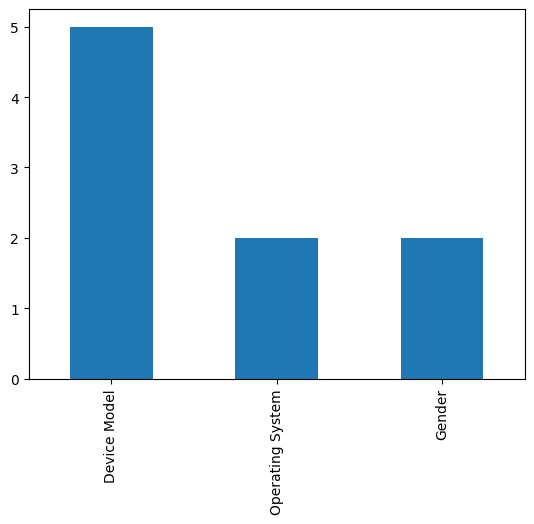

In [309]:
cardinalith = X_train[categorical_features].nunique().sort_values(ascending=False)
print(cardinalith / X_train.shape[0])
cardinalith.plot.bar();

# Data Cleaning

## Type Conversion

In [310]:
print("\nData Types Before Conversion:")
print(X_train.dtypes)

type_mapping = {
    'User ID': int,  
    'Device Model': object,
    'Operating System': object,
    'App Usage Time (min/day)': int,
    'Screen On Time (hours/day)': float,
    'Battery Drain (mAh/day)': int,
    'Number of Apps Installed': int,
    'Data Usage (MB/day)': int,
    'Age': int,
    'Gender': object,
  
}


for column, dtype in type_mapping.items():
    X_train[column] = X_train[column].astype(dtype)

print("\nData Types After Conversion:")
print(X_train.dtypes)


Data Types Before Conversion:
User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
dtype: object

Data Types After Conversion:
User ID                         int32
Device Model                   object
Operating System               object
App Usage Time (min/day)        int32
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int32
Number of Apps Installed        int32
Data Usage (MB/day)             int32
Age                             int32
Gender                         object
dtype: object


## Filter Bad Data

In [311]:
X_train_filter = X_train.copy()

In [312]:
original_shape = X_train_filter.shape
print("\nOriginal shape of the data:")
print(original_shape)

bad_age_condition = (X_train_filter['Age'] < 5) | (X_train_filter['Age'] > 70)


print("\nShape of the data after filtering bad data:")

print("\nNumber of rows filtered out:")



Original shape of the data:
(420, 10)

Shape of the data after filtering bad data:

Number of rows filtered out:


## Replace and Map Categories to Fix Them

In [313]:
X_train['Gender'] = X_train['Gender'].replace({'male': 'Male', 'female': 'Female', 'F': 'Female', 'M': 'Male'})

print("\nUnique values in the 'Gender' column after mapping:")
print(X_train['Gender'].unique())


Unique values in the 'Gender' column after mapping:
['Male' 'Female']


# Drop Unnecessary Features

## Feature Engineering and Transformation

### Transformations Applied to the Target Variable (y)

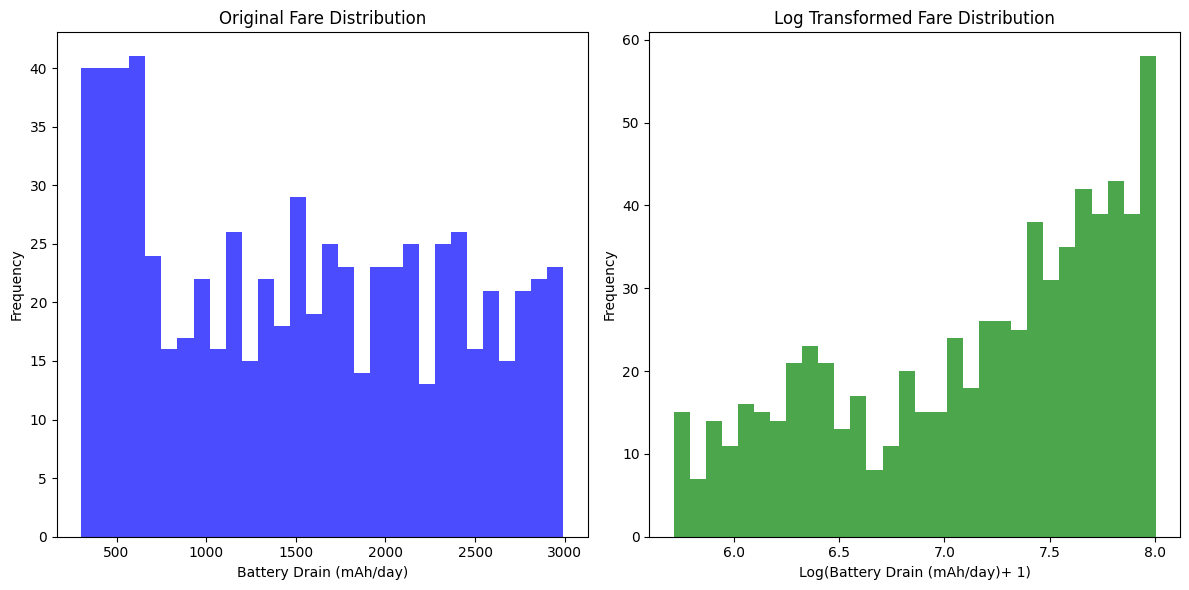

In [314]:
y_fake = data['Battery Drain (mAh/day)']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_fake, bins=30, color='blue', alpha=0.7)
plt.title('Original Fare Distribution')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Frequency')

y_log = np.log1p(y_fake)

plt.subplot(1, 2, 2)
plt.hist(y_log, bins=30, color='green', alpha=0.7)
plt.title('Log Transformed Fare Distribution')
plt.xlabel('Log(Battery Drain (mAh/day)+ 1)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [315]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)

X_train_embarked_encoded = one_hot_encoder.fit_transform(X_train[['Device Model']])

X_train_embarked_encoded = pd.DataFrame(X_train_embarked_encoded, columns=one_hot_encoder.get_feature_names_out(['Device Model']), index=X_train.index)

X_train = pd.concat([X_train.drop('Device Model', axis=1), X_train_embarked_encoded], axis=1)

In [316]:
label_encoder_Gender = LabelEncoder()
Operating_System= LabelEncoder()


X_train['Gender'] = label_encoder_Gender.fit_transform(X_train['Gender'])
X_train['Operating System'] = Operating_System.fit_transform(X_train['Operating System'])


# Feature scaling

In [317]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()

standard_scaler_features = ['Age', 'Gender', 'Operating System', 'App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)','Number of Apps Installed','Data Usage (MB/day)']

X_train[standard_scaler_features] = standard_scaler.fit_transform(X_train[standard_scaler_features])


In [318]:
min_max_scaler = MinMaxScaler()
min_max_scaler_features = ['Battery Drain (mAh/day)']
X_train[min_max_scaler_features] = min_max_scaler.fit_transform(X_train[min_max_scaler_features])

In [319]:
X_train

,User ID,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12
59,60,1.849609,0.309637,0.621092,0.730855,0.494469,0.186244,1.478387,0.922074,0.0,0.0,0.0,1.0
297,298,1.849609,-0.563015,-0.829771,0.186617,-0.912506,-0.909172,1.228082,-1.084512,0.0,0.0,0.0,1.0
13,14,-0.540655,-0.309664,-0.104340,0.505204,-0.283070,-0.116579,0.393733,0.922074,0.0,0.0,1.0,0.0
248,249,-0.540655,-0.574275,-0.401107,0.209294,-1.060609,-0.543003,0.977778,-1.084512,0.0,0.0,1.0,0.0
394,395,-0.540655,1.795961,1.313549,0.877323,1.234982,1.300201,0.560603,-1.084512,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,141,-0.540655,-0.287144,-0.005417,0.448699,-0.320096,-0.428672,0.977778,-1.084512,0.0,0.0,1.0,0.0
480,481,1.849609,-0.647465,-0.928694,0.242007,-0.431173,-0.759306,1.061212,0.922074,0.0,0.0,0.0,1.0
364,365,-0.540655,1.739661,1.115704,0.831227,1.234982,1.548949,-0.357181,0.922074,0.0,0.0,1.0,0.0
30,31,-0.540655,-0.056314,0.258376,0.393309,-0.246044,-0.067138,-0.106876,-1.084512,0.0,0.0,1.0,0.0


# Final Data Preparation

In [320]:
from sklearn.base import BaseEstimator, TransformerMixin

class TypeConverter(BaseEstimator, TransformerMixin):
    def __init__(self, type_mapping):
        self.type_mapping = type_mapping
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        for column, dtype in self.type_mapping.items():
            X_copy[column] = X_copy[column].astype(dtype)
        return X_copy

class SetIndexByPassengerId(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        
        X_copy.set_index('User ID', inplace=True)
        
        return X_copy
    
class SexMappingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, sex_col):
        self.mapping = {'male': 'Male', 'female': 'Female', 'F': 'Female', 'M': 'Male'}
        self.sex_col = sex_col
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        
        X_copy[self.sex_col] = X_copy[self.sex_col].replace(self.mapping)
        return X_copy
    
class ColumnImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean', column_name=None):
        self.strategy = strategy
        self.column_name = column_name
        self.imputer = SimpleImputer(strategy=self.strategy)
        
    def fit(self, X, y=None):
        self.imputer.fit(X[[self.column_name]])
        return self
    ""
    def transform(self, X):
        X_copy = X.copy()
        if self.strategy == 'most_frequent':
            X_copy[self.column_name] = self.imputer.transform(X[[self.column_name]]).flatten()
        else:
            X_copy[self.column_name] = self.imputer.transform(X[[self.column_name]])
        return X_copy
    
class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self, add_title=True, add_family_size=True):
        self.add_title = add_title
        self.add_family_size = add_family_size
        
    def fit(self, X, y=None):
        return self
class OneHotEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column=None, drop_first=True):
        self.column = column
        self.drop_first = drop_first
        self.encoder = OneHotEncoder(drop='first', sparse_output=False)
        
    def fit(self, X, y=None):
        if self.column:
            self.encoder.fit(X[self.column])
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        if self.column:
            X_encoded = self.encoder.transform(X_copy[self.column])
            encoded_df = pd.DataFrame(X_encoded, columns=self.encoder.get_feature_names_out(self.column), index=X_copy.index)
            X_copy = pd.concat([X_copy.drop(self.column, axis=1), encoded_df], axis=1)
        return X_copy
    
class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column=None):
        self.column = column
        self.encoder = LabelEncoder()

    def fit(self, X, y=None):
        if self.column:
            self.encoder.fit(X[self.column])
        return self

    def transform(self, X):
        X_copy = X.copy()
        if self.column:
            X_copy[self.column] = self.encoder.transform(X_copy[self.column])
        return X_copy
    
class ScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, standard_scaler_features=None, min_max_scaler_features=None):
        self.standard_scaler_features = standard_scaler_features
        self.min_max_scaler_features = min_max_scaler_features
        self.standard_scaler = StandardScaler()
        self.min_max_scaler = MinMaxScaler()

    def fit(self, X, y=None):
        if self.standard_scaler_features:
            self.standard_scaler.fit(X[self.standard_scaler_features])
        
        if self.min_max_scaler_features:
            self.min_max_scaler.fit(X[self.min_max_scaler_features])

        return self

    def transform(self, X):
        X_copy = X.copy()
        
        if self.standard_scaler_features:
            X_copy[self.standard_scaler_features] = self.standard_scaler.transform(X_copy[self.standard_scaler_features])
        
        if self.min_max_scaler_features:
            X_copy[self.min_max_scaler_features] = self.min_max_scaler.transform(X_copy[self.min_max_scaler_features])

        return X_copy    
   


In [321]:

type_mapping = {
    'User ID': int,  
    'Device Model': object,
    'Operating System': object,
    'App Usage Time (min/day)': int,
    'Screen On Time (hours/day)': float,
    'Battery Drain (mAh/day)': int,
    'Number of Apps Installed': int,
    'Data Usage (MB/day)': int,
    'Age': int,
    'Gender': object,
  
}

devicemodel_encoder = 'Device Model'
gender_encoder = 'Gender'
operatingsystem_encoder = 'Operating System'
standard_scaler_features = ['Age', 'Gender', 'Operating System', 'App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)','Number of Apps Installed','Data Usage (MB/day)']


In [322]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropFeatures

y_train_cleaned = pd.DataFrame(y_train_copy)
y_train_cleaned.index = X_train_copy['User ID']

pipeline = Pipeline(steps=[
    ('type_converter', TypeConverter(type_mapping)),
    ('onehot_encoder', OneHotEncoderTransformer(column=[devicemodel_encoder])),
    ('sex_label_encoder', LabelEncoderTransformer(column=gender_encoder)),
    ('title_label_encoder', LabelEncoderTransformer(column=operatingsystem_encoder)),
    ('scaler', ScalerTransformer(standard_scaler_features=standard_scaler_features,
                                 )),
])

X_train_cleaned = pipeline.fit_transform(X_train_copy)

In [323]:
print("Differences between X_train and X_train_cleaned:")
print(X_train.compare(X_train_cleaned))


Differences between X_train and X_train_cleaned:
    Battery Drain (mAh/day)          
                       self     other
59                 0.730855  0.921688
297                0.186617 -0.873083
13                 0.505204  0.177545
248                0.209294 -0.798301
394                0.877323  1.404707
..                      ...       ...
140                0.448699 -0.008798
480                0.242007 -0.690418
364                0.831227  1.252691
30                 0.393309 -0.191462
24                 0.523420  0.237616

[420 rows x 2 columns]


In [324]:
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()


# Model Selection and Training

In [325]:
y_val_cleaned = pd.DataFrame(y_val)
y_val_cleaned.index = X_val['User ID']
X_val_cleaned = pipeline.transform(X_val)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


### Logistic Regression

In [326]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_cleaned, y_train_cleaned.values.ravel())

y_train_pred_log_reg = log_reg_model.predict(X_train_cleaned)
y_val_pred_log_reg = log_reg_model.predict(X_val_cleaned)

acc_train_log_reg = accuracy_score(y_train_cleaned, y_train_pred_log_reg)
acc_val_log_reg = accuracy_score(y_val_cleaned, y_val_pred_log_reg)

print("Logistic Regression Accuracy:")
print(f"Training Accuracy: {acc_train_log_reg:.4f}")
print(f"Validation Accuracy: {acc_val_log_reg:.4f}")

Logistic Regression Accuracy:
Training Accuracy: 0.9833
Validation Accuracy: 0.9857


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## K-Nearest Neighbors (KNN)

In [327]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_cleaned, y_train_cleaned.values.ravel())

y_train_pred_knn = knn_model.predict(X_train_cleaned)
y_val_pred_knn = knn_model.predict(X_val_cleaned)

acc_train_knn = accuracy_score(y_train_cleaned, y_train_pred_knn)
acc_val_knn = accuracy_score(y_val_cleaned, y_val_pred_knn)

print("KNN Accuracy:")
print(f"Training Accuracy: {acc_train_knn:.4f}")
print(f"Validation Accuracy: {acc_val_knn:.4f}")

KNN Accuracy:
Training Accuracy: 0.5429
Validation Accuracy: 0.2286


## Decision Tree

In [328]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_cleaned, y_train_cleaned.values.ravel())

y_train_pred_dt = decision_tree_model.predict(X_train_cleaned)
y_val_pred_dt = decision_tree_model.predict(X_val_cleaned)

acc_train_dt = accuracy_score(y_train_cleaned, y_train_pred_dt)
acc_val_dt = accuracy_score(y_val_cleaned, y_val_pred_dt)

print("Decision Tree Accuracy:")
print(f"Training Accuracy: {acc_train_dt:.4f}")
print(f"Validation Accuracy: {acc_val_dt:.4f}")

Decision Tree Accuracy:
Training Accuracy: 1.0000
Validation Accuracy: 1.0000


## Random Forest

In [329]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_cleaned, y_train_cleaned.values.ravel())

y_train_pred_rf = random_forest_model.predict(X_train_cleaned)
y_val_pred_rf = random_forest_model.predict(X_val_cleaned)

acc_train_rf = accuracy_score(y_train_cleaned, y_train_pred_rf)
acc_val_rf = accuracy_score(y_val_cleaned, y_val_pred_rf)

print("Random Forest Accuracy:")
print(f"Training Accuracy: {acc_train_rf:.4f}")
print(f"Validation Accuracy: {acc_val_rf:.4f}")

Random Forest Accuracy:
Training Accuracy: 1.0000
Validation Accuracy: 1.0000


## Analyze the best models and their errors

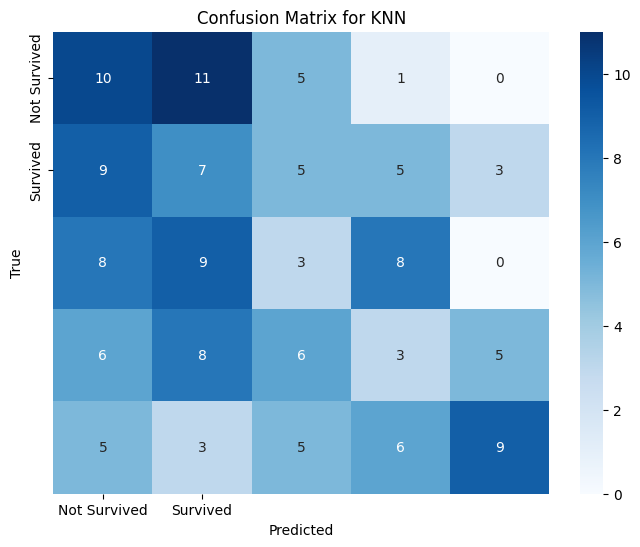

              precision    recall  f1-score   support

           1       0.26      0.37      0.31        27
           2       0.18      0.24      0.21        29
           3       0.12      0.11      0.12        28
           4       0.13      0.11      0.12        28
           5       0.53      0.32      0.40        28

    accuracy                           0.23       140
   macro avg       0.25      0.23      0.23       140
weighted avg       0.25      0.23      0.23       140



In [330]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_val_pred_knn = knn_model.predict(X_val_cleaned)

conf_matrix = confusion_matrix(y_val_cleaned, y_val_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN')
plt.show()

print(classification_report(y_val_cleaned, y_val_pred_knn))

# Train models using pipeline

In [331]:
data = pd.read_csv('C:\\Mobile Device\\Mobile Device .csv')

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [332]:
combined_pipeline = Pipeline(steps=[
    ('preprocessing', pipeline),
    ('model', KNeighborsClassifier())
])

In [333]:

combined_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('type_converter',
                                  TypeConverter(type_mapping={'Age': <class 'int'>,
                                                              'App Usage Time (min/day)': <class 'int'>,
                                                              'Battery Drain (mAh/day)': <class 'int'>,
                                                              'Data Usage (MB/day)': <class 'int'>,
                                                              'Device Model': <class 'object'>,
                                                              'Gender': <class 'object'>,
                                                              'Number of Apps Installed': <class 'int'>,
                                                              'Operating System': <class 'object'>,
                                                              'Sc...
                                  LabelEncoderTransformer(column='Gender')),
                                 ('title_label_encoder',
                                  LabelEncoderTransformer(column='Operating '
                                                                 'System')),
                                 ('scaler',
                                  ScalerTransformer(standard_scaler_features=['Age',
                                                                              'Gender',
                                                                              'Operating '
                                                                              'System',
                                                                              'App '
                                                                              'Usage '
                                                                              'Time '
                                                                              '(min/day)',
                                                                              'Screen '
                                                                              'On '
                                                                              'Time '
                                                                              '(hours/day)',
                                                                              'Battery '
                                                                              'Drain '
                                                                              '(mAh/day)',
                                                                              'Number '
                                                                              'of '
                                                                              'Apps '
                                                                              'Installed',
                                                                              'Data '
                                                                              'Usage '
                                                                              '(MB/day)']))])),
                ('model', KNeighborsClassifier())])

In [334]:
y_train_pred = combined_pipeline.predict(X_train)
y_val_pred = combined_pipeline.predict(X_val)

train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print("\nKNN Model Accuracy:")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


KNN Model Accuracy:
Training Accuracy: 0.5429
Validation Accuracy: 0.2286


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


# Fine-Tuning the Model


In [335]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    estimator=combined_pipeline,
    param_grid=param_grid,
    cv=5,  
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters (Grid Search):", grid_search.best_params_)
print("Best Accuracy (Grid Search):", grid_search.best_score_)

best_pipeline_grid = grid_search.best_estimator_
y_val_pred_grid = best_pipeline_grid.predict(X_val)
val_acc_grid = accuracy_score(y_val, y_val_pred_grid)
print(f"Validation Accuracy (Grid Search): {val_acc_grid:.4f}")

Best Parameters (Grid Search): {'model__metric': 'manhattan', 'model__n_neighbors': 3, 'model__weights': 'distance'}
Best Accuracy (Grid Search): 0.5238095238095237
Validation Accuracy (Grid Search): 0.4786


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [336]:

results_df = pd.DataFrame(grid_search.cv_results_)

print("All Grid Search Results:")
results_df[['param_model__n_neighbors', 'param_model__weights', 'param_model__metric', 'mean_test_score']]

All Grid Search Results:


,param_model__n_neighbors,param_model__weights,param_model__metric,mean_test_score
0,3,uniform,euclidean,0.259524
1,3,distance,euclidean,0.350000
2,5,uniform,euclidean,0.228571
3,5,distance,euclidean,0.307143
4,7,uniform,euclidean,0.185714
5,7,distance,euclidean,0.283333
6,9,uniform,euclidean,0.176190
7,9,distance,euclidean,0.280952
8,3,uniform,manhattan,0.416667
9,3,distance,manhattan,0.523810


## Randomized Search

In [337]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distributions = {
    'model__n_neighbors': np.arange(1, 20),
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'chebyshev']
}

random_search = RandomizedSearchCV(
    estimator=combined_pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters (Randomized Search):", random_search.best_params_)
print("Best Accuracy (Randomized Search):", random_search.best_score_)

best_pipeline_random = random_search.best_estimator_
y_val_pred_random = best_pipeline_random.predict(X_val)
val_acc_random = accuracy_score(y_val, y_val_pred_random)
print(f"Validation Accuracy (Randomized Search): {val_acc_random:.4f}")

Best Parameters (Randomized Search): {'model__weights': 'distance', 'model__n_neighbors': 4, 'model__metric': 'manhattan'}
Best Accuracy (Randomized Search): 0.49523809523809526
Validation Accuracy (Randomized Search): 0.4429


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [338]:
results_df = pd.DataFrame(random_search.cv_results_)

print("All Random Search Results:")
results_df[['param_model__n_neighbors', 'param_model__weights', 'param_model__metric', 'mean_test_score']]

All Random Search Results:


,param_model__n_neighbors,param_model__weights,param_model__metric,mean_test_score
0,3,uniform,chebyshev,0.195238
1,3,uniform,euclidean,0.259524
2,2,uniform,manhattan,0.409524
3,16,distance,manhattan,0.426190
4,6,uniform,euclidean,0.209524
5,4,distance,manhattan,0.495238
6,17,uniform,manhattan,0.326190
7,15,uniform,manhattan,0.335714
8,5,distance,manhattan,0.492857
9,6,distance,euclidean,0.292857


In [339]:
random_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('type_converter',
                                  TypeConverter(type_mapping={'Age': <class 'int'>,
                                                              'App Usage Time (min/day)': <class 'int'>,
                                                              'Battery Drain (mAh/day)': <class 'int'>,
                                                              'Data Usage (MB/day)': <class 'int'>,
                                                              'Device Model': <class 'object'>,
                                                              'Gender': <class 'object'>,
                                                              'Number of Apps Installed': <class 'int'>,
                                                              'Operating System': <class 'object'>,
                                                              'Sc...
                                  LabelEncoderTransformer(column='Operating '
                                                                 'System')),
                                 ('scaler',
                                  ScalerTransformer(standard_scaler_features=['Age',
                                                                              'Gender',
                                                                              'Operating '
                                                                              'System',
                                                                              'App '
                                                                              'Usage '
                                                                              'Time '
                                                                              '(min/day)',
                                                                              'Screen '
                                                                              'On '
                                                                              'Time '
                                                                              '(hours/day)',
                                                                              'Battery '
                                                                              'Drain '
                                                                              '(mAh/day)',
                                                                              'Number '
                                                                              'of '
                                                                              'Apps '
                                                                              'Installed',
                                                                              'Data '
                                                                              'Usage '
                                                                              '(MB/day)']))])),
                ('model',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=4,
                                      weights='distance'))])